In [56]:
# import the pandas package
import pandas as pd

# use the read_excel() function to load the excel file into a dataframe
train_data = pd.read_csv("../OriginalData/train.csv")

# look at the first few records to see that it worked
train_data.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [57]:
# check the basic information of the train data
train_data.info()

# check if there is missing valueprint("Duplicated Data:",train_.duplicated().sum()) of the train data
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
prognosis         0
Length: 66, dtype: int64

Conlusion: There is no missing value in the train data.

In [58]:
# check if there is duplicated records of the train data
print("Duplicated Records:",train_data.duplicated().sum())

Duplicated Records: 0


In [59]:
import itertools
import numpy as np
import seaborn as sns
import csv
corr_matrix= train_data.corr().abs()
upper_tri_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# high_corr_features = [tuple(col1,col2) for col1,col2 in upper_tri_matrix.columns if any(upper_tri_matrix.loc[col1,col2] > 0.2)]
high_corr_features = [(col1, col2) for col1, col2 in itertools.combinations(upper_tri_matrix.columns, 2) if upper_tri_matrix.loc[col1,col2] > 0.6]
print(high_corr_features.__len__())
#figure=sns.heatmap(corr_matrix, annot=True)
# non-related:True,related:False
print(high_corr_features)
with open("../Output/RelatedFeatures.csv","w") as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(["feature_1","feature_2"])
    for row in high_corr_features:
        writer.writerow(row)
# train_reduced=train_data.drop(columns=high_corr_features)
# print(train_reduced)
# which one among highly correlated features be choosed

11
[('slow_heart_rate', 'abdominal_pain'), ('breathing_restriction', 'toe_inflammation'), ('breathing_restriction', 'finger_inflammation'), ('breathing_restriction', 'lips_irritation'), ('toe_inflammation', 'finger_inflammation'), ('toe_inflammation', 'lips_irritation'), ('finger_inflammation', 'lips_irritation'), ('itchiness', 'ulcers'), ('itchiness', 'toenail_loss'), ('ulcers', 'toenail_loss'), ('speech_problem', 'bullseye_rash')]


C:\Users\PC\AppData\Local\Temp/ipykernel_46172/1533094892.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


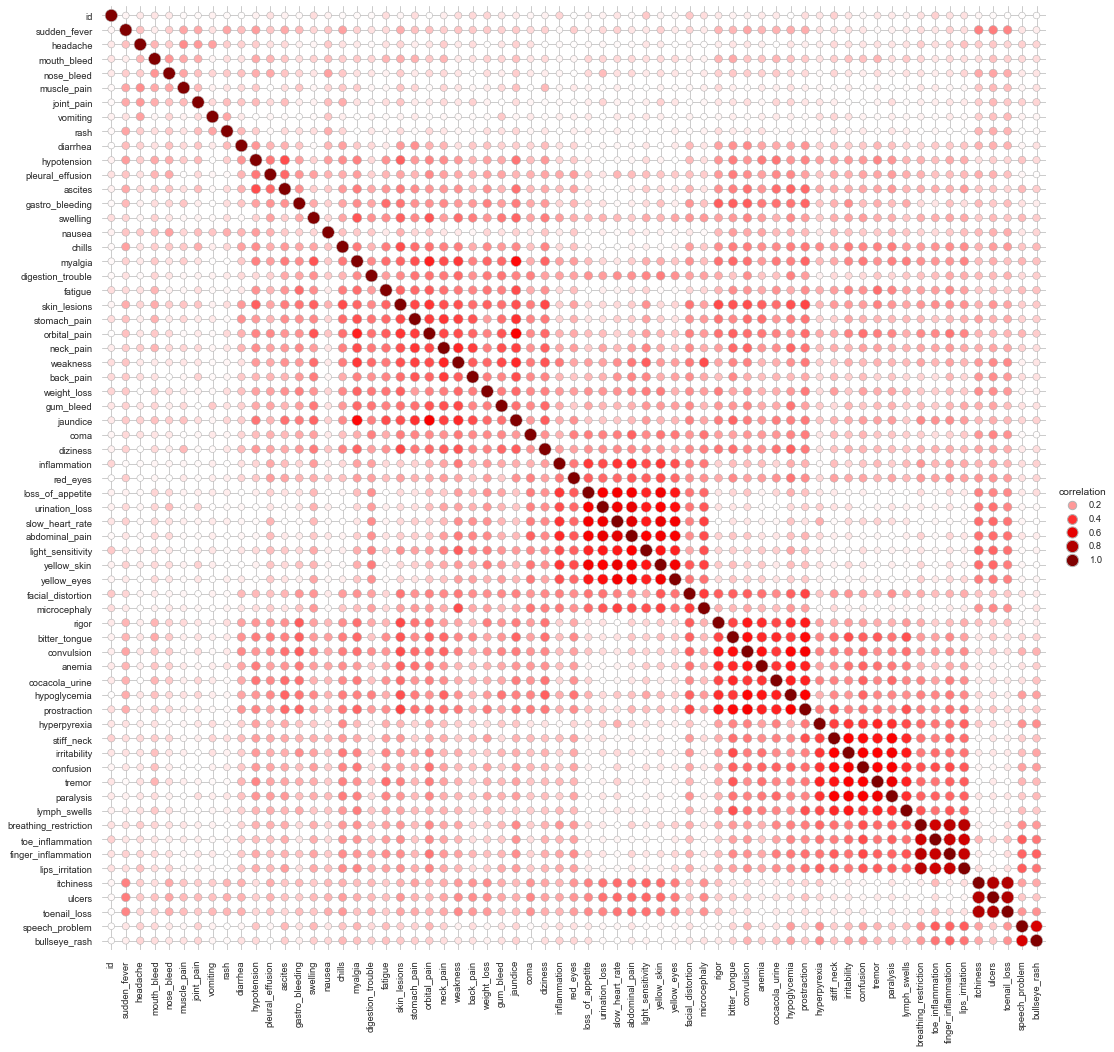

In [60]:
sns.set_theme(style="whitegrid", font_scale=0.85)

# mask = np.tril(np.ones_like(corr_mat, dtype=bool))
# corr_mat = corr_mat.mask(mask)
corr_mat = corr_matrix.stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="seismic", hue_norm=(-1, 1), edgecolor=".7",
    height=15, sizes=(30, 150), size_norm=(-0.1, 0.8)
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.01)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [61]:
'''
Feature Selection:
1) CHI
2) Multi-info
3) ANOVA
'''

'\nFeature Selection:\n1) CHI\n2) Multi-info\n3) ANOVA\n'

In [62]:
from sklearn.feature_selection import SelectKBest, chi2
y=train_data[["prognosis"]]
X=train_data.drop(columns=["prognosis","id"])
X
# X is the matrix of binary features and y is the target variable
selector = SelectKBest(score_func=chi2, k=30)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support()
selected_feature_names_CHI = X.columns[selected_features].tolist()
print(selected_feature_names_CHI)

['stomach_pain', 'neck_pain', 'weakness', 'back_pain', 'weight_loss', 'jaundice', 'diziness', 'inflammation', 'loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion', 'microcephaly', 'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine', 'hypoglycemia', 'prostraction', 'breathing_restriction', 'toe_inflammation', 'finger_inflammation', 'lips_irritation', 'itchiness', 'ulcers', 'toenail_loss']


In [63]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# X is the matrix of binary features and y is the target variable
selector = SelectKBest(score_func=mutual_info_classif, k=30)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support()
selected_feature_names_multiInfo = X.columns[selected_features].tolist()
print(selected_feature_names_multiInfo)

D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


['hypotension', 'pleural_effusion', 'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain', 'gum_bleed', 'jaundice', 'coma', 'diziness', 'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion', 'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine', 'prostraction', 'tremor', 'itchiness', 'ulcers', 'toenail_loss']


In [64]:
from sklearn.feature_selection import SelectKBest,f_classif

# X is the matrix of binary features and y is the target variable
selector = SelectKBest(score_func=f_classif, k=30)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support()
selected_feature_names_AVOVA = X.columns[selected_features].tolist()
print(selected_feature_names_AVOVA)

['myalgia', 'digestion_trouble', 'skin_lesions', 'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain', 'weight_loss', 'jaundice', 'diziness', 'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'facial_distortion', 'microcephaly', 'bitter_tongue', 'convulsion', 'cocacola_urine', 'prostraction', 'breathing_restriction', 'itchiness', 'ulcers', 'toenail_loss']


D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
set_all=set(X.columns)
set_CHI=set(selected_feature_names_CHI)
set_MultiInfor=set(selected_feature_names_multiInfo)
set_ANOVA=set(selected_feature_names_AVOVA)
drop_features=set_all.difference(set_ANOVA,set_CHI,set_MultiInfor)
print(drop_features)
print(drop_features.__len__())

{'speech_problem', 'diarrhea', 'fatigue', 'nausea', 'lymph_swells', 'muscle_pain', 'ascites', 'rash', 'vomiting', 'mouth_bleed', 'headache', 'sudden_fever', 'joint_pain', 'rigor', 'stiff_neck', 'chills', 'confusion', 'nose_bleed', 'paralysis', 'gastro_bleeding', 'swelling', 'hyperpyrexia', 'irritability', 'bullseye_rash'}
24


In [66]:
result=train_data.drop(columns=drop_features)
print(result)
result.to_csv("../Output/Reduction_Result.csv")

      id  hypotension  pleural_effusion  myalgia  digestion_trouble  \
0      0          1.0               1.0      0.0                0.0   
1      1          0.0               1.0      0.0                0.0   
2      2          1.0               1.0      1.0                0.0   
3      3          1.0               1.0      0.0                1.0   
4      4          0.0               0.0      0.0                0.0   
..   ...          ...               ...      ...                ...   
702  702          0.0               0.0      0.0                1.0   
703  703          0.0               0.0      0.0                0.0   
704  704          1.0               0.0      1.0                0.0   
705  705          0.0               1.0      1.0                1.0   
706  706          0.0               0.0      0.0                0.0   

     skin_lesions  stomach_pain  orbital_pain  neck_pain  weakness  ...  \
0             0.0           1.0           0.0        1.0       1.0  ... 

In [67]:
from sklearn.decomposition import PCA
import numpy as np
# Calculate the eigenvalues and eigenvectors of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
feature_names=train_data.columns

# Sort the eigenvalues in descending order
sorted_indices = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Determine the number of eigenvectors to keep
n_components = np.sum(cumulative_variance < 0.95) + 1

# Print the number of eigenvectors to keep
print("Number of eigenvectors to keep: ", n_components)
for i in range(n_components):
    eigenvector = sorted_eigenvectors[:, i]
    feature_name = feature_names[i]
    #print("Eigenvector for {}:\n{}".format(feature_name, eigenvector))
pca=PCA(n_components=n_components)
X=train_data.iloc[:,:-1].values
pca.fit(X)
output=pca.transform(X)
print(output)

Number of eigenvectors to keep:  53
[[ 3.53000761e+02  1.05504672e+00  1.35652640e+00 ...  2.14786566e-01
   2.37668751e-01  4.14446059e-01]
 [ 3.52000090e+02 -1.69071538e+00  5.08515952e-01 ... -5.00457269e-02
  -1.68245851e-01  8.35771088e-02]
 [ 3.50999070e+02  3.20675236e+00  1.51827927e+00 ...  3.23894711e-01
   2.42789166e-01  2.34431133e-01]
 ...
 [-3.51000010e+02  1.28636771e+00 -3.46538878e-01 ...  5.42101005e-01
   1.44819375e-01  1.79283384e-04]
 [-3.52000188e+02  2.67652213e+00  5.46741679e-01 ...  2.57201721e-01
  -4.60001406e-01  3.34822638e-01]
 [-3.52999680e+02 -1.70775067e+00  6.33998696e-01 ...  3.40875923e-01
   1.59748623e-01 -4.34474997e-02]]


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import pandas as pd
import sklearn


# data_set=pd.read_csv("../Output/Reduction_Result.csv")
data_set=pd.read_csv("../OriginalData/train.csv")
X=data_set.drop(columns=["prognosis","id"])
y=data_set["prognosis"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print("X_train.shape:", X_train.shape)
print("Y_train.shape:", y_train.shape)

X_train.shape: (565, 64)
Y_train.shape: (565,)


In [69]:
'''
Model
1) knn: not shown in result
2) random forest
3) neural network, could be replaced by SVC, but I keep the code here
4) SVC
5) LightGBM
ps. there are some error with SVC and LightGBM while using jupyter(seems something wrong with the interpreter)
Just use .py, and codes are in SVC.py and LightGBM.py
'''

'\nModel\n1) knn: not shown in result\n2) random forest\n3) neural network, could be replaced by SVC, but I keep the code here\n4) SVC\n5) LightGBM\nps. there are some error with SVC and LightGBM while using jupyter(seems something wrong with the interpreter)\nJust use .py, and codes are in SVC.py and LightGBM.py\n'

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier()
parameters={
    'n_neighbors':range(1,100,5)
}
grid_search_estimator = GridSearchCV(knn, parameters, scoring='accuracy', cv=10)
grid_search_estimator.fit(X_train, y_train)
result=grid_search_estimator.cv_results_
# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)

knn_bestScore=grid_search_estimator.best_score_
knn_bestParams=grid_search_estimator.best_params_
# print the best parameter setting
print("best score is {} with params {}".format(knn_bestScore, knn_bestParams))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010387,0.002596,0.009641,0.003758,1,{'n_neighbors': 1},0.157895,0.315789,0.192982,0.245614,0.175439,0.285714,0.267857,0.339286,0.196429,0.250000,0.242701,0.057918,19
1,0.008474,0.000899,0.007478,0.000891,6,{'n_neighbors': 6},0.228070,0.280702,0.228070,0.280702,0.192982,0.285714,0.232143,0.321429,0.214286,0.285714,0.254981,0.038855,10
2,0.008307,0.000588,0.006129,0.000306,11,{'n_neighbors': 11},0.245614,0.350877,0.228070,0.333333,0.210526,0.267857,0.250000,0.321429,0.250000,0.267857,0.272556,0.044532,7
3,0.009030,0.002242,0.007596,0.002240,16,{'n_neighbors': 16},0.263158,0.350877,0.210526,0.333333,0.263158,0.267857,0.232143,0.321429,0.232143,0.267857,0.274248,0.044185,5
4,0.011512,0.004051,0.010803,0.003778,21,{'n_neighbors': 21},0.245614,0.403509,0.192982,0.315789,0.245614,0.285714,0.267857,0.357143,0.285714,0.303571,0.290351,0.056675,1
5,0.009559,0.002372,0.008212,0.003097,26,{'n_neighbors': 26},0.245614,0.333333,0.228070,0.315789,0.245614,0.250000,0.285714,0.357143,0.267857,0.250000,0.277914,0.041321,4
6,0.008060,0.000479,0.006747,0.000591,31,{'n_neighbors': 31},0.263158,0.315789,0.228070,0.350877,0.263158,0.321429,0.267857,0.303571,0.250000,0.267857,0.283177,0.035964,2
7,0.007779,0.000398,0.007044,0.000594,36,{'n_neighbors': 36},0.245614,0.333333,0.245614,0.315789,0.245614,0.250000,0.214286,0.357143,0.232143,0.250000,0.268954,0.045620,9
8,0.007995,0.000037,0.007021,0.000587,41,{'n_neighbors': 41},0.228070,0.333333,0.245614,0.280702,0.263158,0.232143,0.214286,0.339286,0.267857,0.321429,0.272588,0.042948,6
9,0.008254,0.000381,0.006686,0.000653,46,{'n_neighbors': 46},0.228070,0.315789,0.245614,0.280702,0.280702,0.232143,0.214286,0.339286,0.267857,0.285714,0.269016,0.037760,8


best score is 0.2903508771929824 with params {'n_neighbors': 21}


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={
    'n_estimators': range(50,60,1),
    'min_samples_split' : range(2,10,2)
}
grid_search_estimator = GridSearchCV(rf, parameters, scoring='accuracy', cv=10)
grid_search_estimator.fit(X_train, y_train)
result=grid_search_estimator.cv_results_
# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
rf_bestScore=grid_search_estimator.best_score_
rf_bestParams=grid_search_estimator.best_params_
# print the best parameter setting
print("best score is {} with params {}".format(rf_bestScore, rf_bestParams))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094446,0.014588,0.006584,0.000993,2,50,"{'min_samples_split': 2, 'n_estimators': 50}",0.245614,0.368421,0.228070,0.315789,0.175439,0.267857,0.285714,0.410714,0.357143,0.232143,0.288690,0.069759,28
1,0.094057,0.010108,0.006808,0.001189,2,51,"{'min_samples_split': 2, 'n_estimators': 51}",0.280702,0.368421,0.280702,0.368421,0.192982,0.250000,0.321429,0.339286,0.214286,0.267857,0.288409,0.057532,30
2,0.089780,0.006835,0.006689,0.000613,2,52,"{'min_samples_split': 2, 'n_estimators': 52}",0.298246,0.315789,0.280702,0.315789,0.192982,0.267857,0.303571,0.339286,0.321429,0.303571,0.293922,0.038754,21
3,0.087861,0.001866,0.006474,0.000560,2,53,"{'min_samples_split': 2, 'n_estimators': 53}",0.210526,0.350877,0.298246,0.315789,0.245614,0.250000,0.267857,0.392857,0.285714,0.357143,0.297462,0.054189,16
4,0.092761,0.011456,0.006804,0.000419,2,54,"{'min_samples_split': 2, 'n_estimators': 54}",0.228070,0.263158,0.298246,0.368421,0.280702,0.321429,0.196429,0.321429,0.321429,0.250000,0.284931,0.048910,36
5,0.091403,0.002384,0.006762,0.000570,2,55,"{'min_samples_split': 2, 'n_estimators': 55}",0.263158,0.298246,0.228070,0.298246,0.245614,0.285714,0.250000,0.446429,0.232143,0.357143,0.290476,0.063721,26
6,0.100767,0.012620,0.007011,0.000797,2,56,"{'min_samples_split': 2, 'n_estimators': 56}",0.280702,0.368421,0.263158,0.263158,0.192982,0.375000,0.250000,0.321429,0.321429,0.267857,0.290414,0.053272,27
7,0.101935,0.012376,0.031086,0.072217,2,57,"{'min_samples_split': 2, 'n_estimators': 57}",0.315789,0.385965,0.315789,0.315789,0.245614,0.267857,0.285714,0.375000,0.303571,0.285714,0.309680,0.041518,6
8,0.117796,0.017402,0.007451,0.001017,2,58,"{'min_samples_split': 2, 'n_estimators': 58}",0.192982,0.333333,0.245614,0.385965,0.175439,0.303571,0.303571,0.446429,0.267857,0.267857,0.292262,0.078334,23
9,0.105298,0.011855,0.008036,0.001131,2,59,"{'min_samples_split': 2, 'n_estimators': 59}",0.280702,0.280702,0.263158,0.280702,0.263158,0.392857,0.285714,0.339286,0.303571,0.321429,0.301128,0.038290,12


best score is 0.318671679197995 with params {'min_samples_split': 8, 'n_estimators': 51}


In [72]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier()

parameters={
    'hidden_layer_sizes': range(1,100,10),
    'learning_rate': ['constant','invascaling','adavative'],

}
grid_search_estimator = GridSearchCV(nn, parameters, scoring='accuracy', cv=10)
grid_search_estimator.fit(X_train, y_train)
result=grid_search_estimator.cv_results_
# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
nn_bestScore=grid_search_estimator.best_score_
nn_bestParams=grid_search_estimator.best_params_
# print the best parameter setting
print("best score is {} with params {}".format(nn_bestScore, nn_bestParams))

D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Python Projects\ppp-interpret

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.911284,5.093407e-02,0.004868,0.000863,1,constant,"{'hidden_layer_sizes': 1, 'learning_rate': 'co...",0.175439,0.192982,0.192982,0.157895,0.157895,0.125000,0.160714,0.178571,0.160714,0.160714,0.166291,0.018970,10
1,0.000598,4.886183e-04,0.000000,0.000000,1,invascaling,"{'hidden_layer_sizes': 1, 'learning_rate': 'in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,0.000499,4.985815e-04,0.000000,0.000000,1,adavative,"{'hidden_layer_sizes': 1, 'learning_rate': 'ad...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,0.451029,2.361289e-02,0.003280,0.000756,11,constant,"{'hidden_layer_sizes': 11, 'learning_rate': 'c...",0.280702,0.245614,0.245614,0.263158,0.280702,0.285714,0.250000,0.267857,0.321429,0.267857,0.270865,0.021815,9
4,0.001217,3.929498e-04,0.000000,0.000000,11,invascaling,"{'hidden_layer_sizes': 11, 'learning_rate': 'i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
5,0.000598,4.879555e-04,0.000000,0.000000,11,adavative,"{'hidden_layer_sizes': 11, 'learning_rate': 'a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
6,1.003732,5.826511e-02,0.004235,0.002147,21,constant,"{'hidden_layer_sizes': 21, 'learning_rate': 'c...",0.210526,0.315789,0.263158,0.368421,0.280702,0.303571,0.267857,0.321429,0.285714,0.285714,0.290288,0.039543,4
7,0.001115,3.015281e-04,0.000000,0.000000,21,invascaling,"{'hidden_layer_sizes': 21, 'learning_rate': 'i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
8,0.001092,2.018786e-04,0.000000,0.000000,21,adavative,"{'hidden_layer_sizes': 21, 'learning_rate': 'a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
9,1.020380,5.966277e-02,0.003083,0.001210,31,constant,"{'hidden_layer_sizes': 31, 'learning_rate': 'c...",0.280702,0.315789,0.298246,0.263158,0.228070,0.339286,0.321429,0.267857,0.250000,0.357143,0.292168,0.039171,3


best score is 0.2957080200501253 with params {'hidden_layer_sizes': 81, 'learning_rate': 'constant'}


In [73]:
'''
apply models and do a vote
Since I could not use LightGBM and SVC in jupyter, so there are only three methods' result in Dataframe, and the other two
are emerged to result.csv manually :(
'''

"\napply models and do a vote\nSince I could not use LightGBM and SVC in jupyter, so there are only three methods' result in Dataframe, and the other two\nare emerged to result.csv manually :(\n"

In [76]:
import pandas as pd
test=pd.read_csv("../OriginalData/test.csv").drop(columns=["id"])
# test=test.drop(columns=drop_features)
estimator_rf=RandomForestClassifier(min_samples_split=rf_bestParams["min_samples_split"],n_estimators=rf_bestParams["n_estimators"])
estimator_knn=KNeighborsClassifier(n_neighbors=knn_bestParams["n_neighbors"])
estimator_nn=MLPClassifier(hidden_layer_sizes=nn_bestParams["hidden_layer_sizes"],learning_rate=nn_bestParams["learning_rate"])
estimator_rf.fit(X_train, y_train)
estimator_knn.fit(X_train, y_train)
estimator_nn.fit(X_train, y_train)
result_rf=estimator_rf.predict(test)
result_knn=estimator_knn.predict(test)
result_nn=estimator_nn.predict(test)

pd.DataFrame({'rf':result_rf,'knn':result_knn,'nn':result_nn}).to_csv("../Output/results.csv",index=False)

D:\Python Projects\ppp-interpreter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [78]:
from collections import defaultdict
import pandas as pd
resultss=pd.read_csv('../Output/results.csv')
# voted=resultss.apply(lambda x: x.value_counts().idxmax(), axis=1)
# voted.to_csv("../Output/voted.csv")

def weighted_voting(votes, weights):
    total_weights = defaultdict(int)
    for vote, weight in zip(votes, weights):
        total_weights[vote] += weight
    max_weight = max(total_weights.values())
    winners = [option for option, weight in total_weights.items() if weight == max_weight]
    return winners

weights = [3,2,2,3,3]

# weited vote
voted = resultss.apply(lambda x: weighted_voting(x, weights)[0], axis=1)

# result
print("Voted:", voted)
voted.to_csv("../Output/voted.csv")

Voted: 0          Rift_Valley_fever
1                     Dengue
2            West_Nile_fever
3      Japanese_encephalitis
4            West_Nile_fever
               ...          
298             Yellow_Fever
299                  Malaria
300             Lyme_disease
301                   Dengue
302                     Zika
Length: 303, dtype: object
